# Prepare Dataset for Model Training and Evaluating

# Cell Data set

https://s3.amazonaws.com/cell_data/



# Checking Pre-Requisites from the Previous `01_setup/` Folder

In [2]:
%store -r setup_instance_check_passed

In [3]:
try:
    setup_instance_check_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++")

In [4]:
print(setup_instance_check_passed)

True


In [5]:
%store -r setup_dependencies_passed

In [6]:
try:
    setup_dependencies_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++")

In [7]:
print(setup_dependencies_passed)

True


In [8]:
%store -r setup_s3_bucket_passed

In [9]:
try:
    setup_s3_bucket_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++")

In [10]:
print(setup_s3_bucket_passed)

True


In [11]:
%store -r setup_iam_roles_passed

In [12]:
try:
    setup_iam_roles_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++")

In [13]:
print(setup_iam_roles_passed)

True


## Check if requirements passed

In [14]:
if not setup_instance_check_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_dependencies_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup Dependencies.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_s3_bucket_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
if not setup_iam_roles_passed:
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup IAM Roles.")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [5]:
import boto3
import sagemaker
import pandas as pd
import matplotlib.pyplot as plt

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

## Download

Let's start by retrieving a subset of the Amazon Customer Reviews dataset.

In [16]:
!aws s3 cp 's3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv' ./data/

download: s3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv to data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [17]:
import csv

df = pd.read_csv(
    's3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv')
df.shape

(672, 159)

In [18]:
df.head(5)

,LabId,PatientId,consensus_sex,inferred_sex,inferred_ethnicity,centerID,CEBPA_Biallelic,ageAtDiagnosis,isRelapse,isDenovo,...,STAG2,STAT3,SUZ12,TCL1A,TET2,TP53,TYK2,U2AF1,WT1,ZRSR2
0,09-00705,163,Male,Male,White,1,n,73.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10-00136,174,Male,Male,White,1,n,69.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10-00172,175,Female,Male,White,1,n,59.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10-00507,45,Female,Female,White,1,n,70.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10-00542,174,Male,Male,White,1,n,69.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
!aws s3 cp 's3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_DrugResponse.csv' ./data/

download: s3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_DrugResponse.csv to data/OHSU_BeatAMLWaves1_2_Tyner_DrugResponse.csv


In [6]:
df1 = pd.read_csv(
    's3://sagemaker-us-east-1-614093401978/cell_data/OHSU_BeatAMLWaves1_2_Tyner_DrugResponse.csv')
df1.shape

(47650, 4)

In [7]:
df1.head(5)

,inhibitor,lab_id,ic50,auc
0,17-AAG (Tanespimycin),12-00211,10.000000,225.918025
1,17-AAG (Tanespimycin),12-00219,0.276661,135.264409
2,17-AAG (Tanespimycin),12-00258,2.722845,164.561227
3,17-AAG (Tanespimycin),12-00262,0.123136,111.555971
4,17-AAG (Tanespimycin),12-00268,10.000000,226.805281


In [19]:
ethnicity = pd.DataFrame(df['inferred_ethnicity'].value_counts())
ethnicity

,inferred_ethnicity
White,554
HispNative,64
Black,27
Asian,17
AdmixedBlack,5
AdmixedWhite,1
AdmixedAsian,1
AdmixedHispNative,1


In [20]:
relapse = pd.DataFrame(df['isRelapse'].value_counts())
relapse

,isRelapse
False,626
True,46


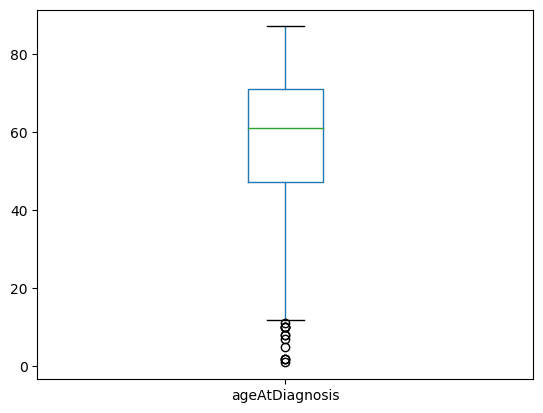

In [21]:
age = df['ageAtDiagnosis']
age.plot(kind = 'box')
plt.show()

# Release Resources

In [22]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [23]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>